In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense

In [23]:
df = pd.read_csv("bankloan.csv")
df = df.dropna()
df.isna().any()

df = df.drop('Loan_ID', axis=1)
df['LoanAmount'] = (df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])

Counter({'N': 148, 'Y': 332})

In [24]:
pre_y = df['Loan_Status']
pre_X = df.drop(['Loan_Status'], axis=1)
dm_X = pd.get_dummies(pre_X)

dm_y = LabelEncoder().fit_transform(pre_y)


In [25]:
smote = SMOTE('minority')
X1, y = smote.fit_sample(dm_X, dm_y)
scaler = MinMaxScaler()
X = scaler.fit_transform(X1)


In [39]:
dm_X.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [40]:
test_df = pd.DataFrame(X_test, columns=dm_X.columns)
test_df.to_csv("test.csv")

In [28]:
classifier = Sequential()
classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal', input_dim=X_test.shape[1]))
classifier.add(Dense(400, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


classifier.fit(X_train, y_train, batch_size=25, epochs=100, verbose=0)
eval_model = classifier.evaluate(X_test, y_test)
eval_model

133/133 [==============================] - 0s 321us/step


[0.6020134732239228, 0.8421052694320679]

In [29]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

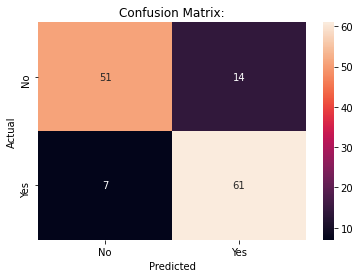

In [30]:
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()

sns.heatmap(cm, annot=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix:')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

In [32]:
import pickle
from sklearn.externals import joblib

filename = 'loan_model.pkl'
joblib.dump(classifier, filename)

['loan_model.pkl']